In [ ]:
from DataLearning.get_data import get_data
import pandas as pd
import numpy as np
import mplfinance as mpf
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
import utils.utils  # Ensure the module is imported first
from utils.utils import CreateTSEDataset
from utils.model import lstm_model

2025-02-25 21:43:38.747909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# symbol = "فملی"
tse_data = get_data(symbols=None, write_to_csv=True, adjust=True)  # Get the data for فملی
# df = pd.read_csv("tickers_data/فملی.csv")

/Users/Ali/Documents/BAI/BAI_programming/tse/.venv/lib/python3.11/site-packages/pytse_client/download.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  new_df.loc[i, "yesterday"] / new_df.shift(1).loc[i, "adjClose"]
/Users/Ali/Documents/BAI/BAI_programming/tse/.venv/lib/python3.11/site-packages/pytse_client/download.py:202: RuntimeWarning: invalid value encountered in scalar multiply
  ratio *= (
/Users/Ali/Documents/BAI/BAI_programming/tse/.venv/lib/python3.11/site-packages/pytse_client/download.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  new_df.loc[i, "yesterday"] / new_df.shift(1).loc[i, "adjClose"]
/Users/Ali/Documents/BAI/BAI_programming/tse/.venv/lib/python3.11/site-packages/pytse_client/download.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  new_df.loc[i, "yesterday"] / new_df.shift(1).loc[i, "adjClose"]
/Users/Ali/Documents/BAI/BAI_programming/tse/.venv/lib/python3.11/site-packages/pytse_client/download.py:203

In [9]:
tse_data.keys()

dict_keys(['فبستم', 'تاصیکوح', 'کسرامح', 'ثمسکنح', 'شتاب', 'شغدیر', 'وسکرد', 'خمحرکهح', 'موج', 'کگازح', 'فسپاح', 'سبجنوح', 'وکغدیر', 'ددام', 'وصندوقح', 'رویش', 'خمحور', 'نماد', 'فپنتا', 'وایران', 'ساوه', 'وآرین', 'ختوقا', 'سمایه', 'گنگین', 'سخوز', 'شگویا', 'کسعدی', 'والماس', 'حآفرین', 'ددامح', 'شپارسح', 'دبالک', 'لسرما', 'فپارس', 'حتاید', 'کزغال', 'شرنگیح', 'ولساپاح', 'سکارونح', 'حکشتی', 'بنیروح', 'ثنظام', 'وساربیل', 'نطرین', 'وصناح', 'سدشتح', 'خپویشح', 'جمح', 'غالبرح', 'ما', 'فاخر', 'غیوان', 'غپاک', 'رافزا', 'ارفع', 'اسیاتک', 'وسصفا', 'پلولهح', 'کاج', 'ثزاگرس', 'ترمه', 'وپاسارح', 'تبرک', 'کتوسعه', 'صنوین', 'کامیاب', 'آلومینا', 'حگهر', 'کمنگنز', 'خنصیرح', 'خودروح', 'فسا', 'قشرین', 'غدشتح', 'شفارس', 'برلیان', 'تمحرکه', 'آوا', 'آسیا', 'فسدید', '18719101', 'سآبیک', 'نبورس', 'شبندر', 'وبهمن', 'فجهانح', 'حپرتو', 'بشهابح', 'سفاسیتح', 'آفرین', 'قزوین', 'وملی', 'خکاوه', 'سحرخیز', 'ثتران', 'وتوسح', 'حخزر', 'حرهشا', 'رانفور', 'قشرینح', 'کحافظ', 'رانفورح', 'استیل', 'کفراح', 'کاماح', 'کبافق', 'کفر

In [19]:
symbol = "مفاخر"
df = tse_data[symbol]  # Get the data for فملی

In [15]:
df.head()  # Show the first 5 rows of the data

,date,open,high,low,adjClose,value,volume,count,yesterday,close
0,2007-02-04,4000.0,4000.0,3600.0,3704.0,640374172370,172898994,2489,4000.0,3704.0
1,2007-02-05,3778.0,3778.0,3778.0,3778.0,40902501888,10826496,1709,3704.0,3778.0
2,2007-02-06,3853.0,3853.0,3853.0,3853.0,103453562449,26850133,4118,3778.0,3853.0
3,2007-02-07,3930.0,3930.0,3930.0,3930.0,122171316570,31086849,4247,3853.0,3930.0
4,2007-02-10,4008.0,4008.0,4008.0,4008.0,162907276224,40645528,4984,3930.0,4008.0


In [16]:
df.tail()

,date,open,high,low,adjClose,value,volume,count,yesterday,close
4001,2025-02-18,8180.0,8350.0,8070.0,8310.0,1379485295190,165905654,7117,8110.0,8350.0
4002,2025-02-19,8420.0,8500.0,8290.0,8370.0,892779169930,106702138,6016,8310.0,8400.0
4003,2025-02-22,8430.0,8430.0,8290.0,8360.0,927715868330,110930931,5461,8370.0,8350.0
4004,2025-02-23,8360.0,8610.0,8360.0,8590.0,1372134821620,159700678,6169,8360.0,8610.0
4005,2025-02-24,8830.0,8840.0,8800.0,8840.0,1571601105480,177803225,3451,8590.0,8840.0


In [20]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index(df['date'])
df = df.drop(['date'], axis=1)
df.head()

,open,high,low,adjClose,value,volume,count,yesterday,close
date,,,,,,,,,
2014-01-07,565.0,565.0,565.0,565.0,49909575000,16918500,14964,192.0,565.0
2014-01-08,593.0,593.0,593.0,593.0,306655649,99017,67,565.0,593.0
2014-01-11,623.0,623.0,623.0,623.0,52094024,16024,50,593.0,623.0
2014-01-12,654.0,654.0,654.0,654.0,10842903046,3176942,957,623.0,654.0
2014-01-13,686.0,686.0,686.0,686.0,7268534711,2028617,466,654.0,686.0


In [ ]:
# df = ichimoku(df)
# df = moving_average(df)
# df = RSI(df)

In [19]:
# just use data after 2023
df = df[df.index.year >= 2023]
print(df.shape)
df.tail()


(486, 21)


,open,high,low,adjClose,value,volume,count,yesterday,close,tenkan_sen,...,senkou_span_a,senkou_span_b,chikou_span,ma5,ma10,ma20,ma60,ma120,ma240,RSI
date,,,,,,,,,,,,,,,,,,,,,
2025-02-18,8180.0,8350.0,8070.0,8310.0,1379485295190,165905654,7117,8110.0,8350.0,8070.0,...,7832.5,7135.0,NaN,8086.0,8070.0,8131.0,7726.000000,6993.416667,6996.791667,50.375940
2025-02-19,8420.0,8500.0,8290.0,8370.0,892779169930,106702138,6016,8310.0,8400.0,8145.0,...,7832.5,7190.0,NaN,8148.0,8112.0,8134.0,7756.333333,7009.750000,7000.750000,60.504202
2025-02-22,8430.0,8430.0,8290.0,8360.0,927715868330,110930931,5461,8370.0,8350.0,8145.0,...,7802.5,7230.0,NaN,8236.0,8146.0,8139.5,7787.000000,7024.833333,7004.625000,59.016393
2025-02-23,8360.0,8610.0,8360.0,8590.0,1372134821620,159700678,6169,8360.0,8610.0,8200.0,...,7882.5,7280.0,NaN,8364.0,8208.0,8167.0,7821.666667,7041.750000,7009.541667,70.000000
2025-02-24,8830.0,8840.0,8800.0,8840.0,1571601105480,177803225,3451,8590.0,8840.0,8315.0,...,7882.5,7280.0,NaN,8510.0,8281.0,8195.5,7856.833333,7060.750000,7015.375000,78.064516


In [20]:
# drop columns chikou_span
df = df.drop(['chikou_span'], axis=1)

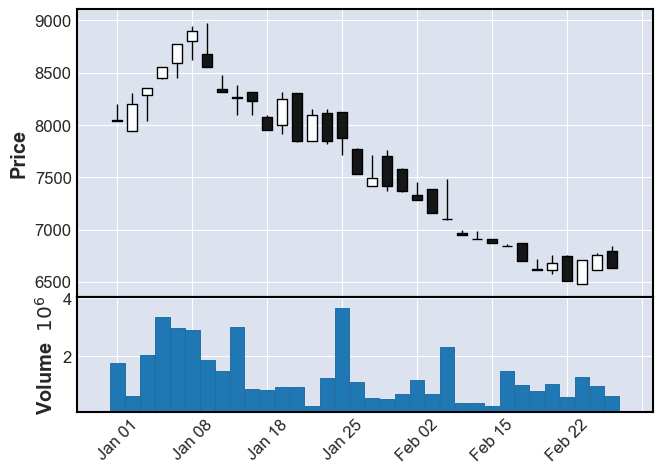

In [21]:
mpf.plot(df[df.index.year>2024], type='candle', volume=True)

In [22]:
importlib.reload(utils.utils)  # Reload the module
from utils.utils import CreateTSEDataset
data_set = CreateTSEDataset(data=df, look_back=14, look_forward=3)

In [ ]:
for key in tse_data.keys():
    

In [25]:
output_columns = ['open', 'high', 'low', 'close']
# X, y = data_set.create_dataset(output_columns=output_columns)
X, y = data_set.create_dataset(output_columns=output_columns)
# X.shape, y.shape
# X_scale, y_scale = data_set.create_dataset_scaled(output_columns=output_columns)
# y_scale_inverse = data_set.inverse_scale_data(y_scale, output_columns)
# compare the original data with the scaled and inverse scaled data
# for i in range(4):
#     plt.plot(y[:, i], label='Original')
#     plt.plot(y_scale_inverse[output_columns[i]], label='Inverse')
#     plt.legend()
#     plt.show()
#     plt.plot(y_scale[:, i], label='Scaled')
#     plt.legend()
#     plt.show()
########## worked well ##########



In [26]:
X.shape, y.shape

((2472, 14, 9), (2472, 3, 4))

[[6480. 6710. 6480. 6710.]
 [6610. 6780. 6610. 6760.]
 [6790. 6840. 6630. 6630.]]
6750.0


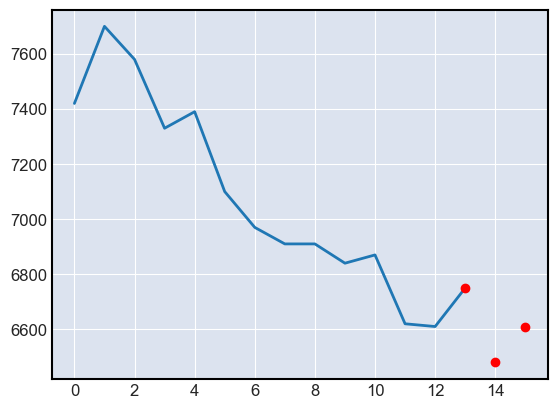

In [29]:
plt.plot(X[-1, :, 0])
plt.plot(np.array([13, 14, 15]), y[-2, :, 0], 'ro')
print(y[-1, :, :])
print(X[-1, -1, 0])

In [83]:
X, y = data_set.create_dataset_scaled(output_columns=output_columns)

In [84]:
# separate the data to train and test
train_percent = 0.8
train_size = int(len(X) * train_percent)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [85]:
# to tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32) 
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [86]:
# lstm model
importlib.reload(utils.model)
from utils.model import lstm_model
model = lstm_model(X_train, y_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 14, 32)            5376      
                                                                 
 lstm_29 (LSTM)              (None, 14, 32)            8320      
                                                                 
 lstm_30 (LSTM)              (None, 16)                3136      
                                                                 
 repeat_vector_7 (RepeatVec  (None, 3, 16)             0         
 tor)                                                            
                                                                 
 lstm_31 (LSTM)              (None, 3, 16)             2112      
                                                                 
 time_distributed_6 (TimeDi  (None, 3, 4)              68        
 stributed)                                           

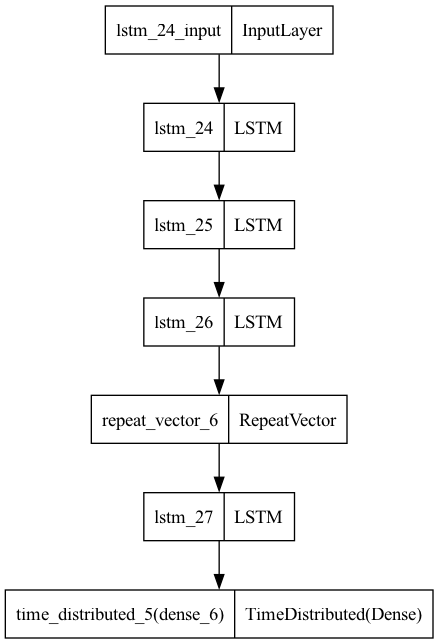

In [72]:
tf.keras.utils.plot_model(model)

In [87]:
# device if gpu is available
device = '/gpu:0' if tf.test.is_gpu_available() else '/cpu:0'
print('Using device:', device)
model.compile(optimizer='adam', loss='mse')

Using device: /cpu:0


In [88]:
with tf.device(device):
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
100/100 [==============================] - 20s 63ms/step - loss: 0.0106 - val_loss: 0.0020
Epoch 2/100
100/100 [==============================] - 3s 25ms/step - loss: 0.0020 - val_loss: 6.8056e-04
Epoch 3/100
100/100 [==============================] - 3s 27ms/step - loss: 0.0012 - val_loss: 9.7516e-04
Epoch 4/100
100/100 [==============================] - 3s 27ms/step - loss: 9.7739e-04 - val_loss: 4.9475e-04
Epoch 5/100
100/100 [==============================] - 3s 29ms/step - loss: 9.0192e-04 - val_loss: 4.4409e-04
Epoch 6/100
100/100 [==============================] - 3s 29ms/step - loss: 8.9269e-04 - val_loss: 9.8781e-04
Epoch 7/100
100/100 [==============================] - 3s 31ms/step - loss: 6.1712e-04 - val_loss: 3.6257e-04
Epoch 8/100
100/100 [==============================] - 3s 29ms/step - loss: 6.1809e-04 - val_loss: 4.7033e-04
Epoch 9/100
100/100 [==============================] - 3s 28ms/step - loss: 5.0477e-04 - val_loss: 3.5213e-04
Epoch 10/100
100/100 [===

In [89]:
X_train.shape, y_train.shape

(TensorShape([3192, 14, 9]), TensorShape([3192, 3, 4]))

In [90]:
X_train[0:1, :, :].shape

TensorShape([1, 14, 9])

In [91]:
predict_data = model.predict(X_test[0:1, :, :])
print(y_test[0, :, :])
print(predict_data) 

1/1 [==============================] - 3s 3s/step
tf.Tensor(
[[0.36067846 0.34833786 0.36467132 0.3677491 ]
 [0.36067846 0.34316388 0.36495382 0.36192062]
 [0.35931936 0.34730306 0.37116867 0.36802664]], shape=(3, 4), dtype=float32)
[[[0.39513943 0.3886261  0.40720353 0.40576684]
  [0.40434507 0.3977937  0.41814366 0.4151666 ]
  [0.40904605 0.40459242 0.42526835 0.42099747]]]


In [93]:
data_ = df.copy()
data_pct = data_.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)
data_pct

,open,high,low,adjClose,value,volume,count,yesterday,close
date,,,,,,,,,
2007-02-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-05,-0.055500,-0.055500,0.049444,0.019978,-0.936127,-0.937383,-0.313379,-0.074000,0.019978
2007-02-06,0.019852,0.019852,0.019852,0.019852,1.529272,1.480039,1.409596,0.019978,0.019852
2007-02-07,0.019984,0.019984,0.019984,0.019984,0.180929,0.157791,0.031326,0.019852,0.019984
2007-02-10,0.019847,0.019847,0.019847,0.019847,0.333433,0.307483,0.173534,0.019984,0.019847
...,...,...,...,...,...,...,...,...,...
2025-02-18,0.018680,0.029593,0.004981,0.024661,-0.028944,-0.052995,0.475332,0.029188,0.029593
2025-02-19,0.029340,0.017964,0.027261,0.007220,-0.352817,-0.356851,-0.154700,0.024661,0.005988
2025-02-22,0.001188,-0.008235,0.000000,-0.001195,0.039133,0.039632,-0.092254,0.007220,-0.005952
